<a href="https://colab.research.google.com/github/St4rLighr/colab_notebook/blob/colabss/2_Digital_marketing_analysis_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 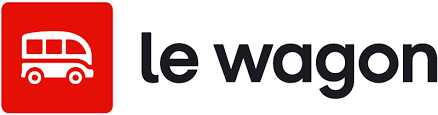


# Digital marketing analysis

In this challenge, we will analyze the digital marketing strategy of Shapr.


## **Load data**



Download and upload [`acquisition_facebook_adds.csv`](https://drive.google.com/file/d/1U4bXgai8KiEWLomvYqMAF-D-0zeKfU_l/view?usp=sharing) file in Google Colab.


Load `acquisition_facebook_adds.csv` data in a DataFrame named `df_facebook`.


In [3]:
import pandas as pd
df_facebook = pd.read_csv("acquisition_facebook_adds.csv")
df_facebook

,date,channel,spend
0,2019-08-01,Media,91.80
1,2019-08-01,Media,44.42
2,2019-08-01,Media,41.98
3,2019-08-01,Facebook,7.02
4,2019-08-01,Facebook,1.09
...,...,...,...
73626,2019-01-18,Media,59.66
73627,2019-01-18,Media,126.23
73628,2019-01-18,Media,10.82
73629,2019-01-18,Media,13.90


## **Data Discovery**


Print `df_facebook` DataFrame.


In [4]:
df_facebook

,date,channel,spend
0,2019-08-01,Media,91.80
1,2019-08-01,Media,44.42
2,2019-08-01,Media,41.98
3,2019-08-01,Facebook,7.02
4,2019-08-01,Facebook,1.09
...,...,...,...
73626,2019-01-18,Media,59.66
73627,2019-01-18,Media,126.23
73628,2019-01-18,Media,10.82
73629,2019-01-18,Media,13.90


How many rows and columns are in this DataFrame ?


In [6]:
df.shape

(73631, 3)

### **Columns selection**

Select only `date` and `spend` columns of this DataFrame and save the result in a `df_facebook_date_spend` variable.


In [9]:
facebook_date_spend = ['date','spend']
df_facebook_date_spend = df[facebook_date_spend]
df_facebook_date_spend

,date,spend
0,2019-08-01,91.80
1,2019-08-01,44.42
2,2019-08-01,41.98
3,2019-08-01,7.02
4,2019-08-01,1.09
...,...,...
73626,2019-01-18,59.66
73627,2019-01-18,126.23
73628,2019-01-18,10.82
73629,2019-01-18,13.90


### **Filtering**


f) Filter the `df_facebook` DataFrame only on the **Media** channel and save the result in a `df_facebook_media` variable.

In [10]:
df_facebook_media = (df_facebook["channel"] == "Media")
df_facebook_media

,channel
0,True
1,True
2,True
3,False
4,False
...,...
73626,True
73627,True
73628,True
73629,True


Filter the `df_facebook` DataFrame on the **Instagram** channel on January 13, 2019.


Save the result in a variable `df_facebook_instagram_20190113`, and export this DataFrame to a csv file named`acquisition_facebook_instagram_20190113.csv`.

In [11]:
df_facebook_ig = (df_facebook["channel"] == "Instagram")
df_facebook_date = (df_facebook["date"] == "2019-01-13")
df_facebook_instagram_20190113 = df_facebook_ig & df_facebook_date
df[df_facebook_instagram_20190113]

,date,channel,spend
6415,2019-01-13,Instagram,0.00
6423,2019-01-13,Instagram,0.02
6438,2019-01-13,Instagram,7.69
6454,2019-01-13,Instagram,6.41
6471,2019-01-13,Instagram,7.43
...,...,...,...
12529,2019-01-13,Instagram,2.53
12546,2019-01-13,Instagram,0.83
12561,2019-01-13,Instagram,0.64
12575,2019-01-13,Instagram,0.03


In [12]:
#export to csv
df_facebook_instagram_20190113.to_csv("facebook_instagram_20190113.csv", index=False)

## **Data Analysis**


### **Cast a date column to datetime**


Convert the `date` column of the `df_facebook` DataFrame to datetime (a Python type for dates).

We'll use the `pd.to_datetime()` function to do this.

Have a look at the syntax in the course. Which **format** should you use here?

In [13]:
#your code here
facebook_date_change = pd.to_datetime(df_facebook["date"])
facebook_date_change

,date
0,2019-08-01
1,2019-08-01
2,2019-08-01
3,2019-08-01
4,2019-08-01
...,...
73626,2019-01-18
73627,2019-01-18
73628,2019-01-18
73629,2019-01-18


### **Aggregate functions**


Over what time period does the data extend?  
You can use the `.min()` and `.max()` aggregation functions on the `date` column.

In [15]:
facebook_date_change.min()

Timestamp('2019-01-01 00:00:00')

In [16]:
facebook_date_change.max()

Timestamp('2019-10-18 00:00:00')

Over the whole period, how much did Shapr spend?

In [ ]:
#your code here

#df_facebook_shapr = (df_facebook["channel"] == "Shapr")
#shapr_spend = df_facebook_shapr & facebook_date_change
#df[shapr_spend]

#shapr_spend = (df_facebook["channel"] == "Shapr") & df_facebook["date"]
#df[shapr_spend]

In [26]:
shapr_spend = df_facebook["spend"].sum()

Calculate the amount of money spent by Shapr day by day.

To do this we will use the `.groupby()` function and then the `.sum()` aggregation function on the `spend` column.

We will store the result in a `df_facebook_daily` variable. You can refer to the lecture for syntax.


**Use the argument as_index=False to get a DataFrame as result**.

In [32]:
df_facebook_daily = df.groupby(["date"],as_index=False)["spend"].sum()
df_facebook_daily

,date,spend
0,2019-01-01,4082.340000
1,2019-01-02,4737.440000
2,2019-01-03,5838.160000
3,2019-01-04,7793.200000
4,2019-01-05,8572.060000
...,...,...
286,2019-10-14,274.900000
287,2019-10-15,285.210008
288,2019-10-16,310.230002
289,2019-10-17,297.490002


We would like to extend the analysis by looking at the marketing spend strategy by channel over time.  


Calculate the amount spent per day per channel. We will store the result in a variable `df_facebook_channel_daily`.

**Use the argument as_index=False again to get a DataFrame as a result**

In [34]:
#your code here
df_facebook_channel_daily = df.groupby(["date", "channel"],as_index=False)["spend"].sum()
df_facebook_channel_daily

,date,channel,spend
0,2019-01-01,Facebook,706.210000
1,2019-01-01,Instagram,1406.140000
2,2019-01-01,Media,1969.990000
3,2019-01-02,Facebook,860.150000
4,2019-01-02,Instagram,1524.340000
...,...,...,...
868,2019-10-17,Instagram,146.470000
869,2019-10-17,Media,48.170002
870,2019-10-18,Facebook,15.930000
871,2019-10-18,Instagram,28.870000


We want to display these values in a graph.

Execute the code below to achieve this (we will have a specific lecture on Data Viz with Python later in the bootcamp)

Comment on Shaphr investments.

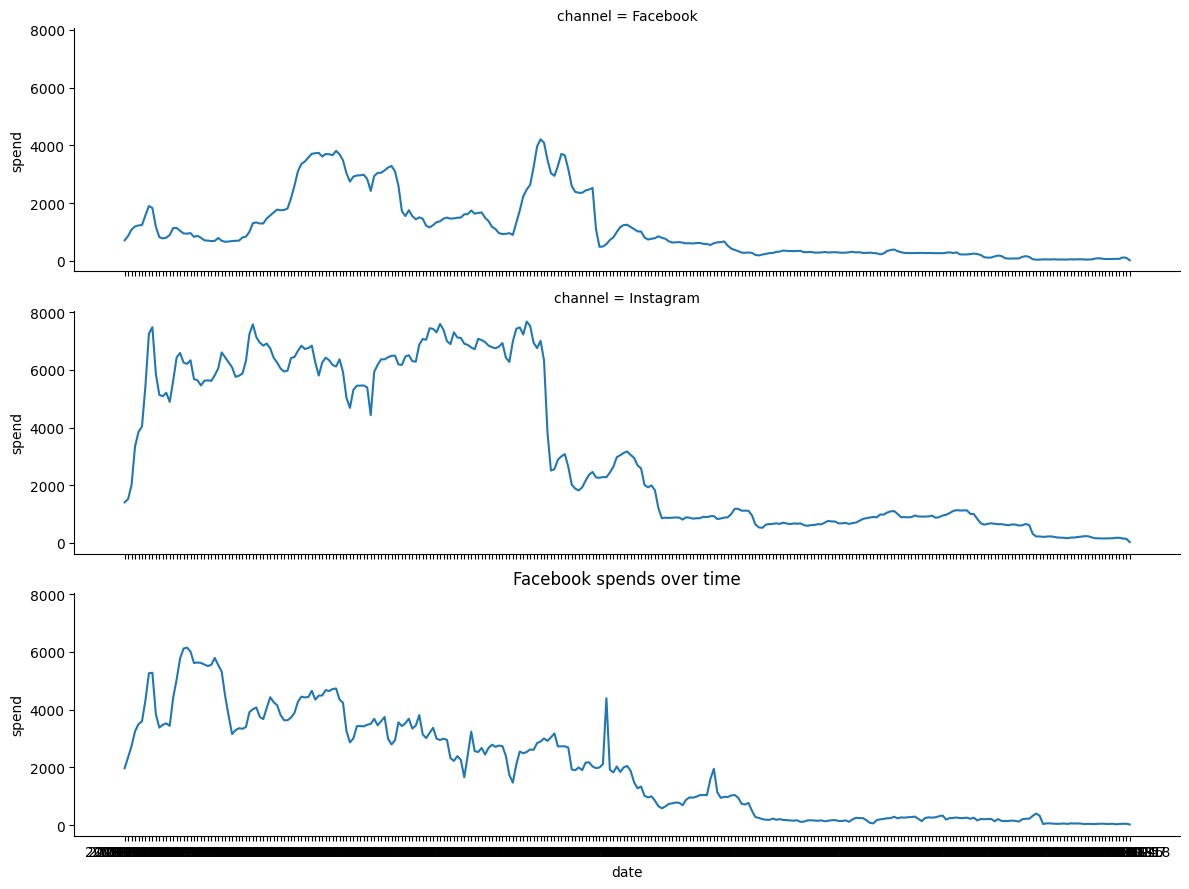

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(kind="line",
            data=df_facebook_channel_daily,
            x="date",
            y="spend",
            row="channel",
            height=3,
            aspect=12/3)
plt.xlabel("date")
plt.ylabel("spend")
plt.title("Facebook spends over time")
plt.show()

> **Your Answer Here (Double click)**



## **Data Wrangling**


### **Join two dataframes**


Load the file [`social_network_taxes.csv`](https://drive.google.com/file/d/1Lleeq3STLbX_wL6j6jNwlFt5eJRrIrAF/view?usp=sharing) into a `df_taxes` DataFrame and display it.


This represents the fee applied by each of the social networks as a tax  (not real numbers). \
**I.e.** for a fee of 0.10, if you invest 100 (spend=100), the social network takes 10 as tax.

In [36]:
df_taxes = pd.read_csv("social_network_taxes.csv")
df_taxes

,channel,tax
0,Instagram,0.20
1,Facebook,0.15
2,Media,0.10


Merge the two DataFrames `df_facebook` and `df_taxes` and store the result in a variable `df_facebook_merged`.

Display `df_facebook_merged`, which new column has just appeared?

Look at the syntax in your course.

In [38]:
#your code here
df_facebook_merged = pd.merge(df_facebook,df_taxes, on=["channel"], how="inner")
df_facebook_merged

,date,channel,spend,tax
0,2019-08-01,Media,91.80,0.1
1,2019-08-01,Media,44.42,0.1
2,2019-08-01,Media,41.98,0.1
3,2019-08-01,Media,32.09,0.1
4,2019-08-01,Media,32.89,0.1
...,...,...,...,...
73626,2019-01-18,Instagram,15.02,0.2
73627,2019-01-18,Instagram,31.19,0.2
73628,2019-01-18,Instagram,37.31,0.2
73629,2019-01-18,Instagram,49.31,0.2


Create a new column in `df_facebook_merged` that corresponds to the spend column minus the tax.

We'll call this column `real_spend`.

<details>
    <summary> Hint 💡 </summary>
You can use the columns in a DataFrame as variables for doing arithmetic operations.
</details>


In [39]:
#your code here
df_facebook_merged["real_spend"] = df_facebook_merged["spend"] - df_facebook_merged["tax"]
df_facebook_merged

,date,channel,spend,tax,real_spend
0,2019-08-01,Media,91.80,0.1,91.70
1,2019-08-01,Media,44.42,0.1,44.32
2,2019-08-01,Media,41.98,0.1,41.88
3,2019-08-01,Media,32.09,0.1,31.99
4,2019-08-01,Media,32.89,0.1,32.79
...,...,...,...,...,...
73626,2019-01-18,Instagram,15.02,0.2,14.82
73627,2019-01-18,Instagram,31.19,0.2,30.99
73628,2019-01-18,Instagram,37.31,0.2,37.11
73629,2019-01-18,Instagram,49.31,0.2,49.11
